In [1]:
from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random

# Problem 3) [4 pts] Application of Keras to build, compile, and train a neural network as a three class classifier for MNIST dataset (0 vs. 1 vs. 2):

### a. Use mnist function in keras.datasets to load MNIST dataset and split it into training and testing sets. Then, randomly select 20% of the training images along with their corresponding labels to be the validation data.

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# randomly selection 20% images for validation
max_range = len(x_train)
random_list = random.sample(range(0, max_range), int(max_range * 20 / 100))

x_val = np.asarray([x_train[i] for i in random_list])
y_val = np.asarray([y_train[i] for i in random_list])

### b. Feature extraction: average the pixel values in the quadrants in each image to generate a feature vector of 4 values for each image.

In [3]:
def feat_extract(images):
  width=images.shape[1]
  height=images.shape[2]
  features=np.zeros((images.shape[0],4))
  features_temp=np.sum(images[:,0:int(width/2),0:int(height/2)],axis=2)#quadrant 0
  features[:,0]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,0:int(width/2),int(height/2):],axis=2) #quadrant 1
  features[:,1]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,0:int(height/2)],axis=2) #quadrant 2
  features[:,2]=np.sum(features_temp,axis=1)/(width*height/4)
  features_temp=np.sum(images[:,int(width/2):,int(height/2):],axis=2)  #quadrant 3
  features[:,3]=np.sum(features_temp,axis=1)/(width*height/4)
  return features

In [4]:
#Calculating the training, validation and testing feature (average of the four quadrants grid)
feature_train=feat_extract(x_train)
feature_val=feat_extract(x_val)
feature_test=feat_extract(x_test)

### c. Convert the label vectors for all the sets to binary class matrices using to_categorical() Keras function.

In [5]:
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
y_val_cat = keras.utils.to_categorical(y_val, num_classes)

In [6]:
def plot_curve(accuracy_train, loss_train):
  epochs=np.arange(loss_train.shape[0])
  plt.subplot(1,2,1)
  plt.plot(epochs,accuracy_train)
  #plt.axis([-1,2,-1,2])
  plt.xlabel('Epoch#')
  plt.ylabel('Accuracy')
  plt.title('Training Accuracy')

  plt.subplot(1,2,2)
  plt.plot(epochs,loss_train)
  plt.xlabel('Epoch#')
  plt.ylabel('Binary crossentropy loss')
  plt.title('Training loss')
  plt.show()

In [7]:
def model_report(title, model_in):
    
    print('----------------------------------------------------')
    print(title)
    print('----------------------------------------------------')
    
    history = model_in.fit(feature_train, y_train_cat, batch_size=16, epochs=50, verbose=0) 
    
    train_score = model_in.evaluate(feature_train,y_train_cat)
    
    val_score = model_in.evaluate(feature_val, y_val_cat)

    print('Training Loss: ', train_score[0])
    print('Training Accuracy: ', train_score[1])

    print('Validation Loss: ', val_score[0])
    print('Validation Accuracy: ', val_score[1])
    
    plt.figure(figsize=[9,5])
    acc_curve = np.array(history.history['accuracy'])
    loss_curve = np.array(history.history['loss'])
    plot_curve(acc_curve, loss_curve)
    plt.show()
    print('----------------------------------------------------')

### d. Build, compile, train, and then evaluate:
i. Build a neural network with 1 layer that contains 10 nodes using the Keras library. <br>
ii. Compile the network. Make sure to select a correct loss function for this classification problem. Use stochastic gradient descent learning (SGD, learning rate of 0.0001). Explain your selection of the loss function.<br>
iii. Train the network for 50 epochs and a batch size of 16.<br>
iv. Plot the training loss (i.e., the learning curve) for all the epochs.<br>
v. Use the evaluate() Keras function to find the training and validation loss and accuracy.

##### Answer: 
For this multi-class classification, I chose 'categorical_crossentropy' for loss function.  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------
Model 1 - 1 Layer, 10 nodes
----------------------------------------------------
375/375 [==============================] - 0s 1ms/step - loss: 1.6667 - accuracy: 0.4199
Training Loss:  1.6486412286758423
Training Accuracy:  0.42606666684150696
Validation Loss:  1.6666806936264038
Validation Accuracy:  0.41991665959358215


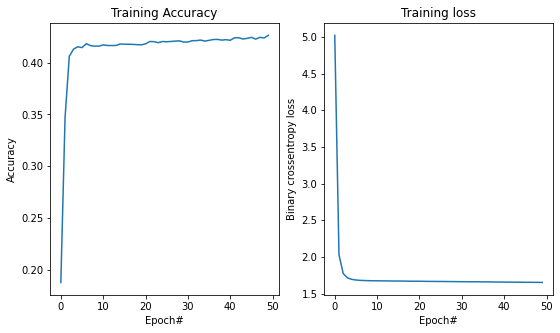

----------------------------------------------------


In [8]:
model1 = keras.Sequential()
model1.add(keras.layers.Dense(input_dim=4, units=10, activation='softmax'))
model1.summary()

model1.compile(loss='categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), 
               metrics=['accuracy'])

model_report('Model 1 - 1 Layer, 10 nodes', model1)

### e. Repeat step (d) for each of the following networks:

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                250       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------
Model 2 - 1 Layer, 50 nodes, and Output layer
----------------------------------------------------
375/375 [==============================] - 1s 2ms/step - loss: 1.4760 - accuracy: 0.4771
Training Loss:  1.4580975770950317
Training Accuracy:  0.4820333421230316
Validation Loss:  1.4759976863861084
Validation Accuracy:  0.47708332538604736


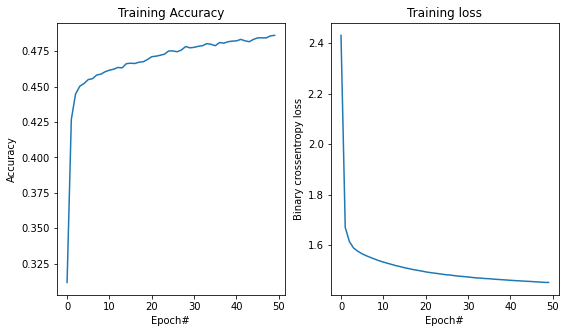

----------------------------------------------------


In [9]:
model2 = keras.Sequential()
model2.add(keras.layers.Dense(input_dim=4, units=50, activation='relu'))
model2.add(keras.layers.Dense(units=10, activation='softmax'))
model2.summary()

model2.compile(loss='categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), 
               metrics=['accuracy'])

model_report('Model 2 - 1 Layer, 50 nodes, and Output layer', model2)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------
Model 3 - 1 Layer, 100 nodes, and Output layer
----------------------------------------------------
375/375 [==============================] - 0s 1ms/step - loss: 1.4211 - accuracy: 0.4899
Training Loss:  1.4031950235366821
Training Accuracy:  0.4970000088214874
Validation Loss:  1.4210580587387085
Validation Accuracy:  0.4899166524410248


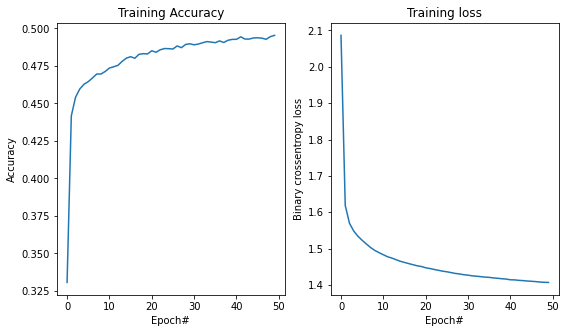

----------------------------------------------------


In [10]:
model3 = keras.Sequential()
model3.add(keras.layers.Dense(input_dim=4, units=100, activation='relu'))
model3.add(keras.layers.Dense(units=10, activation='softmax'))
model3.summary()

model3.compile(loss='categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), 
               metrics=['accuracy'])

model_report('Model 3 - 1 Layer, 100 nodes, and Output layer', model3)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 1,510
Trainable params: 1,510
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------
Model 4 : 2 Layers - 100 nodes, 10 nodes
----------------------------------------------------
375/375 [==============================] - 0s 1ms/step - loss: 1.4201 - accuracy: 0.4893
Training Loss:  1.4040207862854004
Training Accuracy:  0.4968166649341583
Validation Loss:  1.4201396703720093
Validation Accuracy:  0.4892500042915344


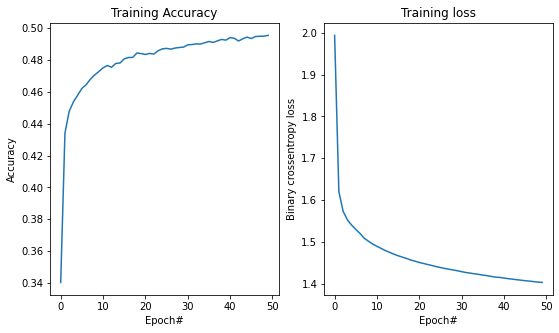

----------------------------------------------------


In [11]:
model4 = keras.Sequential()
model4.add(keras.layers.Dense(input_dim=4, units=100, activation='relu'))
model4.add(keras.layers.Dense(units=10, activation='softmax'))
model4.summary()

model4.compile(loss='categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), 
               metrics=['accuracy'])

model_report('Model 4 : 2 Layers - 100 nodes, 10 nodes', model4)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_8 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                510       
Total params: 6,060
Trainable params: 6,060
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------
Model 5 : 2 Layers - 100 nodes, 50 nodes, and Output layer
----------------------------------------------------
375/375 [==============================] - 0s 1ms/step - loss: 1.4015 - accuracy: 0.4936
Training Loss:  1.384465217590332
Training Accuracy:  0.4984833300113678
Validation Loss:  1.4015496969223022
Validation Accurac

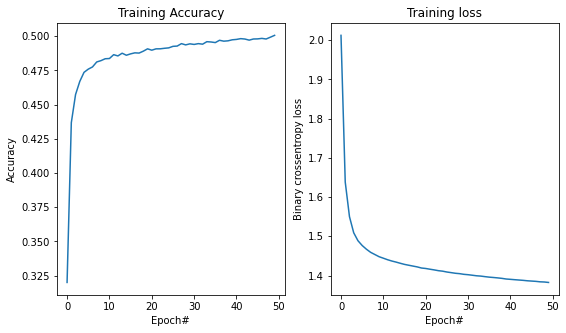

----------------------------------------------------


In [12]:
model5 = keras.Sequential()
model5.add(keras.layers.Dense(input_dim=4, units=100, activation='relu'))
model5.add(keras.layers.Dense(units=50, activation='relu'))
model5.add(keras.layers.Dense(units=10, activation='softmax'))
model5.summary()

model5.compile(loss='categorical_crossentropy', 
               optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001), 
               metrics=['accuracy'])

model_report('Model 5 : 2 Layers - 100 nodes, 50 nodes, and Output layer', model5)

### f. What behavior do you observe in the training loss and the validation loss when you increase the number layers and nodes in the previous table. Which model is more suitable in this problem? Explain.

##### Answer
It is observed that Model 3, Model 4 and Model 5 had validation accuracy of 0.489, 0.489 and 0.493 respectively.<br>
Adding additional layer did not improve the model 4 and 5 performance drastically.<br>
Therefore in this case, I propose Model 3 which has single layer and there are less model parameters for computation.

### g. Evaluate the selected model in part (e) on the testing set and report the testing loss and accuracy.

In [16]:
test_score = model3.evaluate(feature_test, y_test_cat)
print('Test Loss: ', test_score[0])
print('Test Accuracy: ', test_score[1])

313/313 [==============================] - 0s 1ms/step - loss: 1.3952 - accuracy: 0.5032
Test Loss:  1.3952128887176514
Test Accuracy:  0.5031999945640564
